# Homework 1: Applied Machine Learning Assignment

This assignment covers contents of the first three lectures.

We will be focusing on topics related to
1. Data Visualization and Analysis
2. Supervised Learning - Linear Regression, Logistic Regression, and SVM with Data Preprocessing.

### **Due Date is October 3, 11:59 PM.** 

## Name: Brian Sohn
## UNI: bs3358

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score


In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

# Task 1: Data Visualization and Analysis

"Now that's A LOT of data. Can you show me something I can understand?"

This question often arises when we see datasets with thousands of rows and want to understand the characteristics of data. 

Data visualization comes to our rescue!

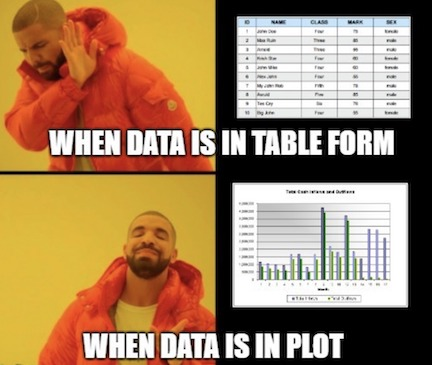


### We are going to use the credit-dataset for Task 1. 

**1.1 Plot the distribution of the features - credit_amount, age, and duration using a histogram.
Make sure to label your axes while plotting. [6 points]**



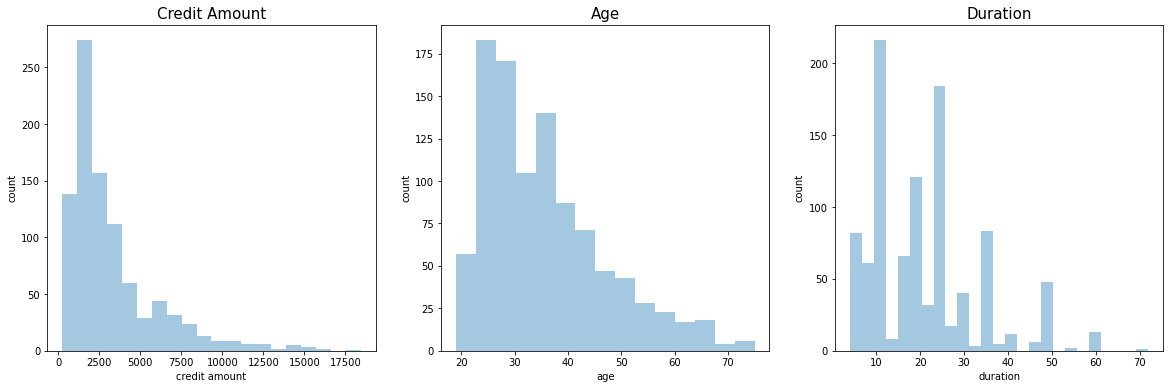

In [4]:
# YOUR CODE HERE
df_credit = pd.read_csv('dataset_credit.csv')

# draw histograms
fig, axes = plt.subplots(1,3, figsize = (20, 6))

sns.distplot(df_credit['credit_amount'].values, kde=False, bins=20, ax = axes[0]) # choose appropriate number of bins
axes[0].set_title('Credit Amount', fontsize = 15)
axes[0].set_xlabel('credit amount')
axes[0].set_ylabel('count')

sns.distplot(df_credit['age'].values, kde=False, bins=15, ax = axes[1])
axes[1].set_title('Age', fontsize = 15)
axes[1].set_xlabel('age')
axes[1].set_ylabel('count')

sns.distplot(df_credit['duration'].values, kde=False, bins=25, ax = axes[2])
axes[2].set_title('Duration', fontsize = 15)
axes[2].set_xlabel('duration')
axes[2].set_ylabel('count')

plt.show()

**1.2 Plot the relationships between the features - class and credit_amount using box plots. Make sure to label the axes[4 points]**



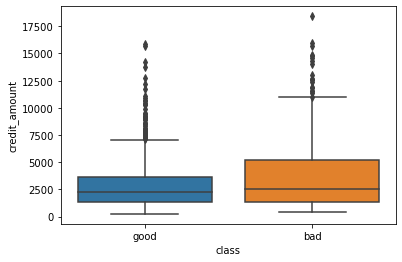

In [5]:
# Your code here
sns.boxplot(x = df_credit['class'], y = df_credit['credit_amount'])
plt.show()

**1.3 Plot the distribution of label 'class' using a pie chart. Be sure to label correctly. What do you infer about the data and its distribution from all the plots? (1.1, 1.2, and 1.3)[5 points]**

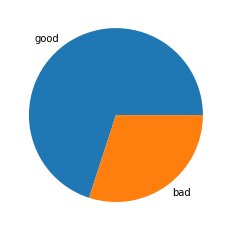

In [6]:
# Your code here
plt.pie(df_credit['class'].value_counts().to_list(), labels = ['good', 'bad'])
plt.show()

Most loans are made to people under 40 with a duration under 3 years. There is a 7:3 split between good and bad loans. Loans classified as bad tend to be ones with higher credit amounts than those classified as good. 

# Task 2 : Linear Models for Regression and Classification

In this notebook, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

## Part 1: Linear Regression

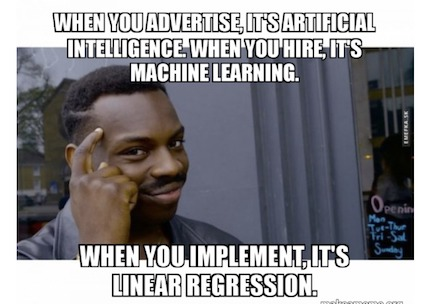

In part 1, we will use two datasets - synthetic and auto-mpg to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:

$ 𝜖 ∼ Normal(0,3) $

$ y = 5𝑥 + 10 + 𝜖 $

In [7]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
# y = np.linspace(0, 5, 100)
y = 5 * x + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the 𝜖's, and thus the $y$'s, have constant variance.
*   Normality: the 𝜖's are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.1 Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?[2 points]**

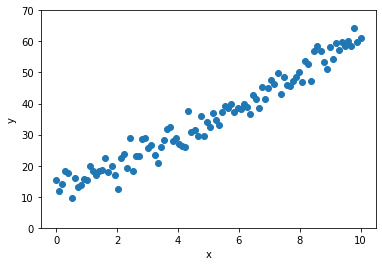

In [8]:
# Your code here
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0,70])
plt.show()

# x and y has a linear relationship

The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [9]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [10]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**2.1.2 Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.[4 points]**

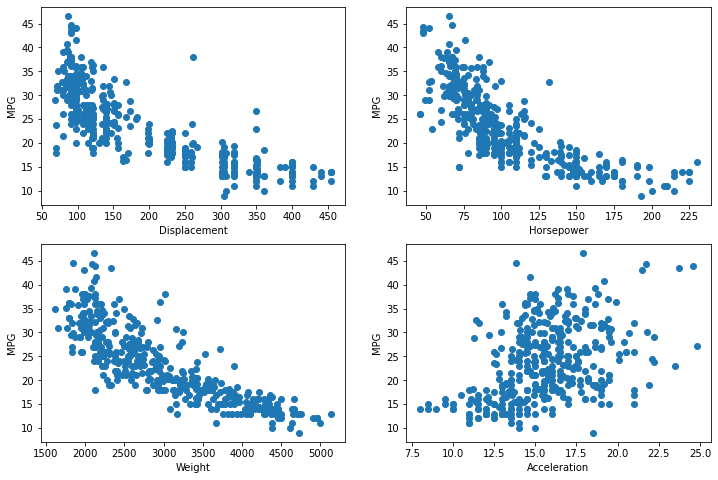

In [11]:
# Your code here
fig, axes = plt.subplots(2,2, figsize = (12,8))

axes[0,0].scatter(auto_mpg_X['displacement'], auto_mpg_y)
axes[0,0].set_xlabel('Displacement')
axes[0,0].set_ylabel('MPG')

axes[0,1].scatter(auto_mpg_X['horsepower'], auto_mpg_y)
axes[0,1].set_xlabel('Horsepower')
axes[0,1].set_ylabel('MPG')

axes[1,0].scatter(auto_mpg_X['weight'], auto_mpg_y)
axes[1,0].set_xlabel('Weight')
axes[1,0].set_ylabel('MPG')

axes[1,1].scatter(auto_mpg_X['acceleration'], auto_mpg_y)
axes[1,1].set_xlabel('Acceleration')
axes[1,1].set_ylabel('MPG')

plt.show()

**2.1.3 Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.[3 points]**

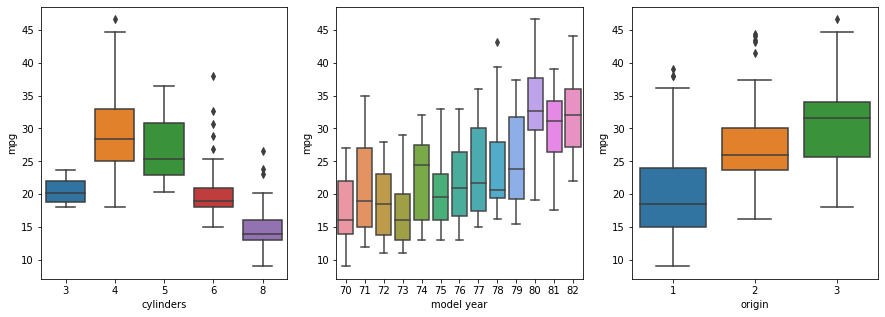

In [12]:
# Your code here
fig, axes = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(x = auto_mpg_X['cylinders'], y = auto_mpg_y, ax = axes[0])
sns.boxplot(x = auto_mpg_X['model year'], y = auto_mpg_y, ax = axes[1])
sns.boxplot(x = auto_mpg_X['origin'], y = auto_mpg_y, ax = axes[2])

plt.show()

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.[2 points]**

In [13]:
# Your answer here 
# It would be a fairly good model, since the x-variables (both continuous and categorical) seem to have a roughly linear relationship with the y-variable.
# However displacement, horsepower, and weight seem to have a slightly non-linear relationship, so we might want to run a 
# linear regression model with log-transformed variables as well to compare results. 

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:


In [14]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [38.44273829 19.38966655 26.79105322 30.69326568 45.00432104]


**2.1.5 Apply the same processing steps on the auto MPG dataset.[3 points]**

In [15]:
# Your code here

# 1. Encode categorical features appropriately

    # origin: ordinal encoding (justified from boxplot)
auto_mpg_X_processed = auto_mpg_X.copy()
auto_mpg_X_processed['origin_ord'] = OrdinalEncoder(categories = [[1,2,3]]).fit_transform(auto_mpg_X['origin'].to_numpy().reshape(-1,1))
auto_mpg_X_processed.drop(columns = ['origin'], inplace=True)

    # cylinders: one-hot encoding 
auto_mpg_X_processed = pd.get_dummies(auto_mpg_X_processed, columns=['cylinders'],drop_first=True)

    # model year: target encoding (too many to do one-hot encoding)
auto_mpg_X_processed = TargetEncoder(cols=['model year']).fit(auto_mpg_X_processed, auto_mpg_y).transform(auto_mpg_X_processed)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(np.array(auto_mpg_X_processed), np.array(auto_mpg_y), test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)   # Fit and transform scalar on X_train
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)           # Transform X_val
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])

[[ 1.          0.39492947  0.1100916   0.8241919   0.28262047 -0.1430291
  -0.77559006 -1.02597835 -0.11396058  1.80403588 -0.54112631]
 [ 1.         -0.97348359 -0.87531843 -1.20346504 -0.54674887 -0.3821645
   0.43433043  0.97467943 -0.11396058 -0.5543127  -0.54112631]
 [ 1.          1.33761402  1.37704734  1.02260224 -1.159761   -1.27685216
  -0.77559006 -1.02597835 -0.11396058 -0.5543127   1.84799739]
 [ 1.         -0.5173459  -0.48115442 -0.53443504 -0.00585582  1.34023741
  -0.77559006  0.97467943 -0.11396058 -0.5543127  -0.54112631]
 [ 1.         -0.97348359 -1.49471902 -1.0244118   2.15771638  2.06382056
   0.43433043  0.97467943 -0.11396058 -0.5543127  -0.54112631]] 

 [18.  29.  15.  27.2 44.3]


C:\Users\sohnh\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\sohnh\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.6 Implement a `LinearRegression` class with two methods: `train` and `predict`.[8 points]**
You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [16]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        self.w = np.linalg.inv(X.transpose().dot(X) + self.alpha*np.identity(X.shape[1])).dot(X.transpose()).dot(y)
        return None   
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return X.dot(self.w)

### Train,  Evaluate, and Interpret Linear Regression Model

**2.1.7 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.[3 points]**

In [17]:
# Your code here
linreg = LinearRegression(alpha=0)
linreg.train(X_train,y_train)
y_predicted = linreg.predict(X_test)
y_test

print('predicted')
print(y_predicted[:3], y_predicted[-3:])
print('actual')
print(y_test[:3], y_test[-3:])

predicted
[23.29684501 53.01355017 11.41016295] [22.30628817 26.76379395 14.38183346]
actual
[23.26858868 56.97068215 13.94631496] [28.93047599 20.72427726 13.73074749]


**2.1.8 Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.[2 points]** If your line goes through the data points, you have likely implemented the linear regression correctly!

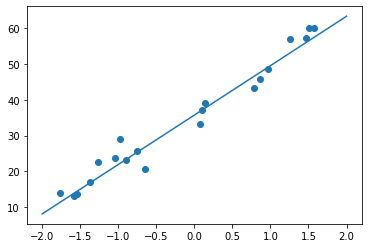

In [18]:
# Your code here
x_temp = np.linspace(-2,2,100).reshape(100,1)
x_temp = np.hstack([np.ones((x_temp.shape[0], 1)), x_temp])

plt.scatter(X_test[:,1], y_test)
plt.plot(x_temp[:,1], linreg.predict(x_temp))
plt.show()

**2.1.9 Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.[4 points]**

In [19]:
# Your code here
linear_model = LinearRegression(alpha=0)
linear_model.train(auto_mpg_X_train, auto_mpg_y_train)

pred_train = linear_model.predict(auto_mpg_X_train)
pred_val = linear_model.predict(auto_mpg_X_val)
pred_test = linear_model.predict(auto_mpg_X_test)

print('train MSE: ', np.mean((pred_train - auto_mpg_y_train) * (pred_train - auto_mpg_y_train)))
print('validation MSE: ', np.mean((pred_val - auto_mpg_y_val) * (pred_val - auto_mpg_y_val)))
print('test MSE: ', np.mean((pred_test - auto_mpg_y_test) * (pred_test - auto_mpg_y_test)))

print('')
print('predicted')
print(pred_test[:3], pred_test[-3:])
print('actual')
print(auto_mpg_y_test[:3], auto_mpg_y_test[-3:])

train MSE:  7.755287621651092
validation MSE:  9.228382065739503
test MSE:  8.63675804136365

predicted
[28.39055654 25.53225348 12.10885262] [29.54923419 21.27525851 31.23440066]
actual
[28.  22.3 12. ] [26.  19.2 31.5]


**2.1.10 As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. [3 points]** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [20]:
# Your code here
base_pred = np.mean(auto_mpg_y_train)

print('train MSE: ', np.mean((base_pred - auto_mpg_y_train) * (base_pred  - auto_mpg_y_train)))
print('validation MSE: ', np.mean((base_pred  - auto_mpg_y_val) * (base_pred  - auto_mpg_y_val)))
print('test MSE: ', np.mean((base_pred  - auto_mpg_y_test) * (base_pred  - auto_mpg_y_test)))

# This is much higher than our linear regression models' MSEs. 

train MSE:  60.56461465410184
validation MSE:  60.47988929483249
test MSE:  62.4616051879408


**2.1.11 Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. [3 points]** Make sure to label the bars (x-axis) and don't forget the bias term!

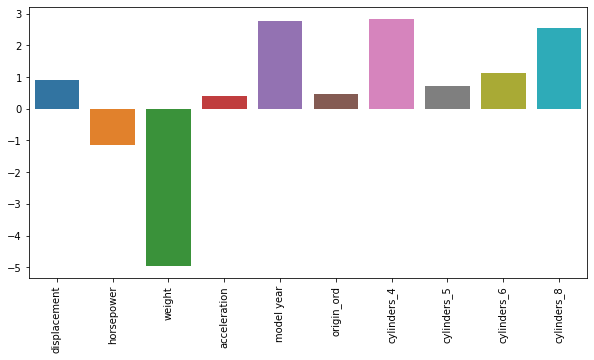

In [22]:
# Your code here
fig = plt.figure(figsize = (10,5))
ax = sns.barplot(x = auto_mpg_X_processed.columns, y = linear_model.w[1:])
ax.tick_params(axis = 'x', rotation = 90)


**2.1.12 According to your model, which features are the greatest contributors to the MPG?[2 points]**

In [23]:
# Your answer here
# It seems that weight, model year, and cylinder (especially 4 and 8) are important features for the model. 

### Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**2.1.13 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.[4 points]**

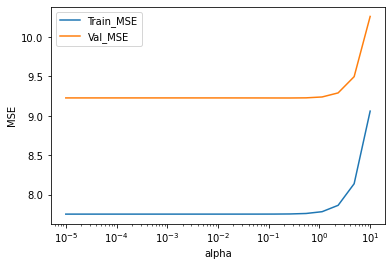

In [24]:
# Your code here
alphas = np.logspace(-5,1,20)
train_scores = []
val_scores = []

for a in alphas: 
    lin = LinearRegression(alpha = a)
    lin.train(auto_mpg_X_train, auto_mpg_y_train)
    
    pred_train = lin.predict(auto_mpg_X_train)
    pred_val = lin.predict(auto_mpg_X_val)
    
    train_scores.append(np.mean((pred_train - auto_mpg_y_train) * (pred_train - auto_mpg_y_train)))
    val_scores.append(np.mean((pred_val - auto_mpg_y_val) * (pred_val - auto_mpg_y_val)))

plt.plot(alphas, train_scores, label = 'Train_MSE')
plt.plot(alphas, val_scores, label = 'Val_MSE')
plt.legend()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

**2.1.14 Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?[ 2 points]**

In [25]:
# Your answer here
# As model complexity decreases (as alpha increases), both training and validation MSE increases. This behavior is especially prominent when log(alpha) is bigger than 1. 


## Part 2: Logistic Regression

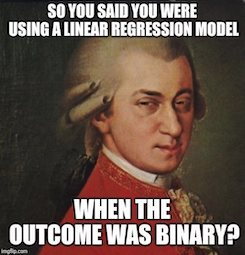






**In this part we would use Logistic Regression on NBA rookie stats to predict if player will last 5 years in league**

Class variable represent:
y = 0 if career years played < 5
y = 1 if career years played >= 5


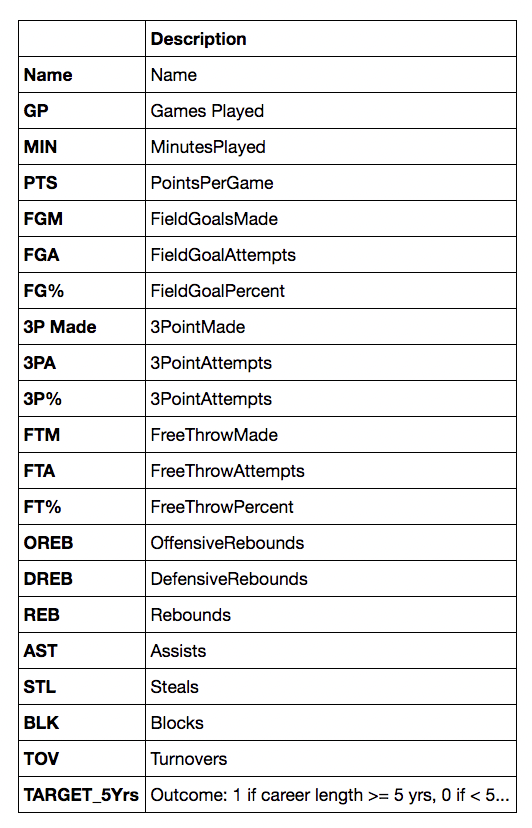

In [26]:
nba_reg = pd.read_csv("nba_logreg.csv")
nba_reg.head()
nba_reg.shape

(1340, 21)

#### Missing Value analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)
(Note: Name your dataset as nba_reg_new after removing NAs) [2 points]**

In [27]:
# Your code here 
# Check if there are missing values in the dataset
nba_reg.info()

# 3P% has null values. This is probably because there are players that did not attempt 3 point shots. Let's check. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [28]:
nba_reg[nba_reg['3P%'].isnull()] 
# Indeed, 3P% is null for players that have 3PA (3 point attempt) = 0. 
# We don't want to simply remove every player that do not have 3 point attempts. This might be some useful information. 
# Why did they not shoot 3 pointers? Probably becuase they were not given the role, becuase they are not good 3 point shooters. 
# So we will fill all NAs with 0 instead of removing these players. 

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


In [29]:
# Your Code here
nba_reg_new = nba_reg.fillna(0)

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.[3 points]**

In [30]:
# Your code here
nba_reg_new.groupby(['TARGET_5Yrs']).size() / nba_reg_new.shape[0] 
# It's not the most balanced, since 62% of the data has y variable = 1 and 38% has y variable = 0. 

TARGET_5Yrs
0.0    0.379851
1.0    0.620149
dtype: float64

In [31]:
nba_X = nba_reg_new.drop(columns=['TARGET_5Yrs'])
nba_y = nba_reg_new['TARGET_5Yrs']
print(nba_X.shape)

(1340, 20)


**2.2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?[4 points]**

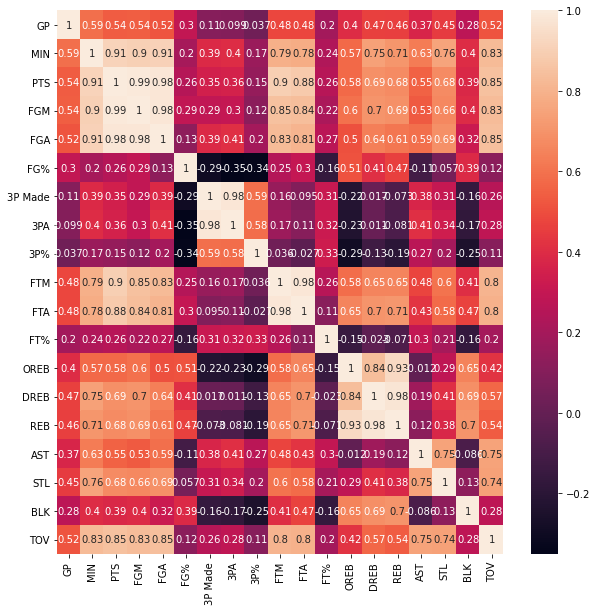

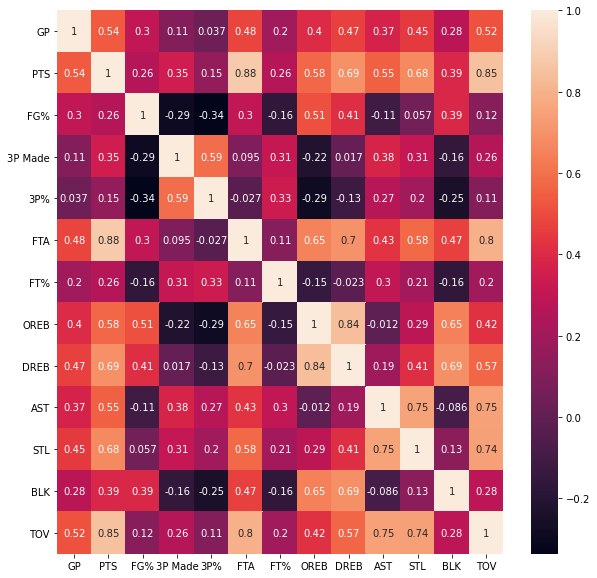

In [32]:
# Your code here
plt.figure(figsize = (10,10))
sns.heatmap(nba_X.corr(), annot=True)
plt.show()

# There are many columns that are correlated with each other. 
# drop min, fgm, fga, 3pa, ftm, reb. 
nba_X.drop(columns = ['MIN', 'FGM', 'FGA', '3PA', 'FTM', 'REB'], inplace=True)

plt.figure(figsize = (10,10))
sns.heatmap(nba_X.corr(), annot=True)
plt.show()
# no more columns with correlation >= 0.9. 

# This process is necessary since we do not want multicolliearity in our model. Multicollinearity can increase coefficients' variance too much. 


**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [33]:
# Split data into features and labels

nba_new_X = nba_X.drop(columns=['Name'])
nba_new_Y = nba_reg_new['TARGET_5Yrs']
print(nba_new_X.columns)

Index(['GP', 'PTS', 'FG%', '3P Made', '3P%', 'FTA', 'FT%', 'OREB', 'DREB',
       'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')


**2.2.4 Apply the following pre-processing steps:[5 points]**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [34]:
# Your code here

# 2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
nba_new_X = np.array(nba_new_X)
nba_new_y = np.array(nba_new_Y).reshape(-1,1)

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
nba_new_X_dev, nba_new_X_test, nba_new_y_dev, nba_new_y_test = train_test_split(np.array(nba_new_X), np.array(nba_new_y), test_size=0.2, random_state=0)
nba_new_X_train, nba_new_X_val, nba_new_y_train, nba_new_y_val = train_test_split(nba_new_X_dev, nba_new_y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
scaler = StandardScaler()
nba_new_X_train = scaler.fit_transform(nba_new_X_train)   # Fit and transform scalar on X_train
nba_new_X_val = scaler.transform(nba_new_X_val)           # Transform X_val
nba_new_X_test = scaler.transform(nba_new_X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.
nba_new_X_train = np.hstack([np.ones((nba_new_X_train.shape[0], 1)), nba_new_X_train])
nba_new_X_val = np.hstack([np.ones((nba_new_X_val.shape[0], 1)), nba_new_X_val])
nba_new_X_test = np.hstack([np.ones((nba_new_X_test.shape[0], 1)), nba_new_X_test])


### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [35]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.[6 points]**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.[2 points] 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)[ 3 points]**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.[1 point]

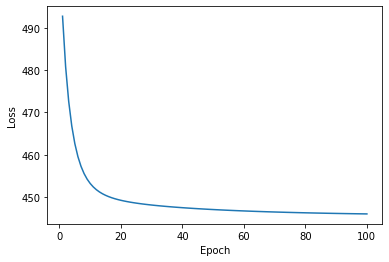

In [36]:
# Your code here 
# Part A
logreg = LogisticRegression()
losses = logreg.train(nba_new_X_train, nba_new_y_train)

plt.plot([i+1 for i in range(logreg.t)], np.array(losses)[:,0,0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [37]:
# Part B and C

#B

import random
random.seed(31)
param_list = []

for i in range(20):
    alpha = random.uniform(0,1)
    eta = random.uniform(0,0.001)
    t = random.randint(0,100)
    
    logistic_model = LogisticRegression(alpha = alpha, t = t, eta = eta)
    logistic_model.train(nba_new_X_train,  nba_new_y_train)
    acc = accuracy_score(nba_new_y_val, logistic_model.predict(nba_new_X_val))
    
    param_list.append((alpha, eta, t, acc))

best_param = max(param_list, key = lambda x: x[-1])
print('best parameters: alpha = ', best_param[0], ', eta = ', best_param[1], ', t = ', best_param[2])

#C
best_model = LogisticRegression(alpha = best_param[0], eta = best_param[1], t = best_param[2])
best_model.train(nba_new_X_train,  nba_new_y_train)

print('Model A:', accuracy_score(nba_new_y_test, logreg.predict(nba_new_X_test)))
print('Model B:', accuracy_score(nba_new_y_test, best_model.predict(nba_new_X_test)))

best parameters: alpha =  0.9613234938171246 , eta =  0.0009764307793174895 , t =  12
Model A: 0.7126865671641791
Model B: 0.7089552238805971


### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term![2 points]**

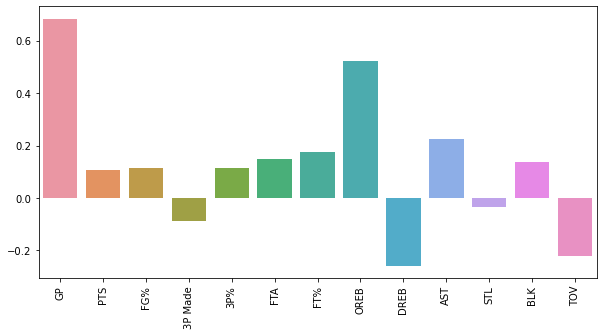

In [38]:
# Your code here
# Your code here
fig = plt.figure(figsize = (10,5))
ax = sns.barplot(x = nba_X.drop(columns=['Name']).columns, y = logreg.w.flatten()[1:])
ax.tick_params(axis = 'x', rotation = 90)


# Games played and Offensive Rebounds play a significant role in this model. 





# **Part 3: Support Vector Machines**

In this part, we will be using a breast cancer dataset for classification. 

Given 30 continuous features describing the nuclei of cells in a digitized image of a fine needle aspirate (FNA) of a breast mass, we will train SVM models to classify each sample as benign (B) or malignant (M).

In [39]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
# Split data into features and labels

cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

**The following pre-processing steps have been applied to the breast cancer dataset in the next cell:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [41]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cancer_df['diagnosis'] = cancer_df.diagnosis.astype("category").cat.codes
cancer_y_enc = cancer_df['diagnosis'].to_numpy()
cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)
print(cancer_y_enc.shape)
print(type(cancer_y_enc))


cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y_enc, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train) 
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)


cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])


(569, 1)
<class 'numpy.ndarray'>


### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [42]:
# Your code here
primal = LinearSVC(loss='hinge')
primal.fit(cancer_X_train, cancer_y_train.reshape(-1,))
print('train accuracy:', accuracy_score(cancer_y_train, primal.predict(cancer_X_train)))
print('validation accuracy:', accuracy_score(cancer_y_val, primal.predict(cancer_X_val)))
print('test accuracy:', accuracy_score(cancer_y_test, primal.predict(cancer_X_test)))





train accuracy: 0.9912023460410557
validation accuracy: 0.9473684210526315
test accuracy: 0.9649122807017544


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [43]:
# Your code here

dual = SVC(kernel = 'linear')
dual.fit(cancer_X_train, cancer_y_train.reshape(-1,))
print('train accuracy:', accuracy_score(cancer_y_train, dual.predict(cancer_X_train)))
print('validation accuracy:', accuracy_score(cancer_y_val, dual.predict(cancer_X_val)))
print('test accuracy:', accuracy_score(cancer_y_test, dual.predict(cancer_X_test)))






train accuracy: 0.9912023460410557
validation accuracy: 0.9473684210526315
test accuracy: 0.9649122807017544
